**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `Andrew Hamel` and `Lohith Annadevula` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Valmor de Almeida`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**10Dec2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

Solve the heat conduction problem 1/2 plate. Find $u:[a,b]\text{ } \mathbb{R} \rightarrow \mathbb{R}$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'(x)\bigr)'(x) + S(x)u(x) + f(x)\, &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= 0 | Neumann B.C., \\
 q_n(b) &= h(u-u_{\infty}) | Robin B.C.
\end{align*}
   
Given data: thermal conductivity coefficient, $D $, source, $S = 0$, $u_{ref}$ = 25 °C, h = 1.02 $\frac{W}{in^2 * K}$ and source bias $f$. 

## Neumann (left) / Robin (right) B.C. 

\begin{align*}
    A_{i,j} = (k \phi_i^\prime,\phi_j^\prime) - (S \phi_i, \phi_j) + h\phi_j(b)\phi_i(b) \\
    b_{i} = (f,\phi_i)  - q_{na}\phi_i(a) + hu_{ref}\phi_i(b)
\end{align*}


### Domain
`describe domain`

In [ ]:
'''Domain'''


In [4]:
import numpy as np
import numpy as nm
import scipy.integrate as integrate
import scipy
import pandas as pd

from matplotlib import pyplot as plt
from engy_5310_Andrew import *

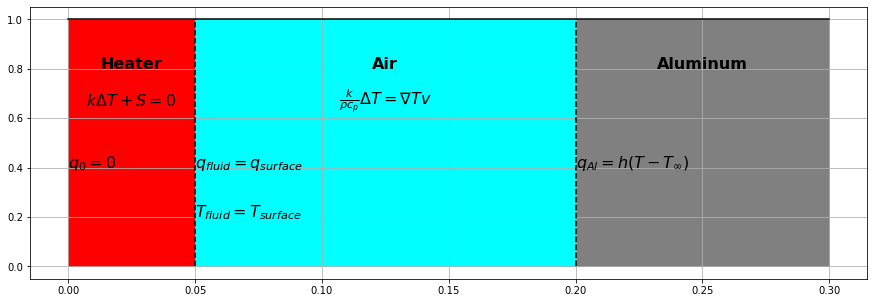

In [5]:
num_pts = 100

a = 0.0
b = 0.05
c = 0.20
d = c + 0.1

x = np.linspace(0,d,num_pts)
y = np.linspace(1,1,num_pts)

x_a = np.linspace(a,b,num_pts)
x_b = np.linspace(b,c,num_pts)
x_c = np.linspace(c,d,num_pts)
y0 = np.linspace(0,0,num_pts)


fig = plt.figure(figsize=(15,5))
plt.plot(x,y,"k-")
plt.plot([b,b],[0,1],"k--")
plt.plot([c,c],[0,1],"k--")

plt.grid()
#plt.ylim(0,d+0.1)

section = np.arange(a,b, 1/20.)
plt.fill_between(x_a,y,y0,color="red")
plt.fill_between(x_b,y,y0,color="cyan")
plt.fill_between(x_c,y,y0,color="gray")

#Domain Labels
plt.text((b-a)/2 + a ,0.8,"Heater",color="black",fontsize=16,weight="bold",horizontalalignment="center")
plt.text((c-b)/2 + b,0.8,"Air",color="black",fontsize=16,weight="bold",horizontalalignment="center")
plt.text((d-c)/2 + c,0.8,"Aluminum",color="black",fontsize=16,weight="bold",horizontalalignment="center")

#Heater B.C. and gov eqn
plt.text(a,0.4,"$q_{0} = 0$",color="black",fontsize=16)
plt.text((b-a)/2 + a,0.65,"$k\Delta T + S = 0$",color="black",fontsize=16,horizontalalignment="center")

#Air B.C. and gov eqn
plt.text((c-b)/2 + b,0.65,r"$\frac{k}{\rho c_p} \Delta T  = \nabla T v$",color="black",fontsize=16,horizontalalignment="center")
plt.text(b,0.4,"$q_{fluid} = q_{surface}$",color="black",fontsize=16)
plt.text(b,0.2,"$T_{fluid} = T_{surface}$",color="black",fontsize=16)

plt.text(c,0.4,"$q_{Al} = h(T-T_{\infty})$",color="black",fontsize=16)


#plt.arrow(.23,.6,-0.028,0.2,color="red",size=18)
plt.show()



## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [ ]:
'''Domain'''


In [ ]:
'''Parameters'''


In [ ]:
'''Data (boundary conditions for testing purposes)'''


In [ ]:
'''FEM Solution'''


#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


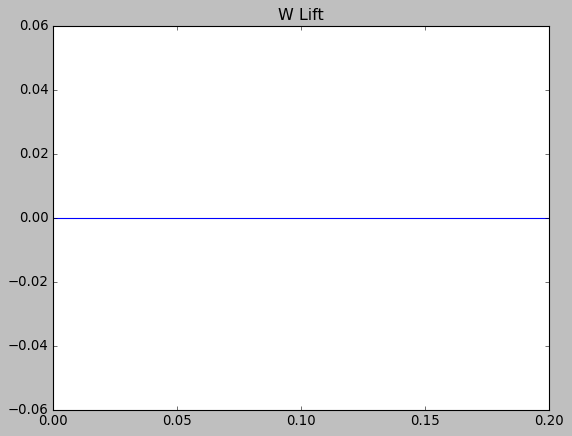

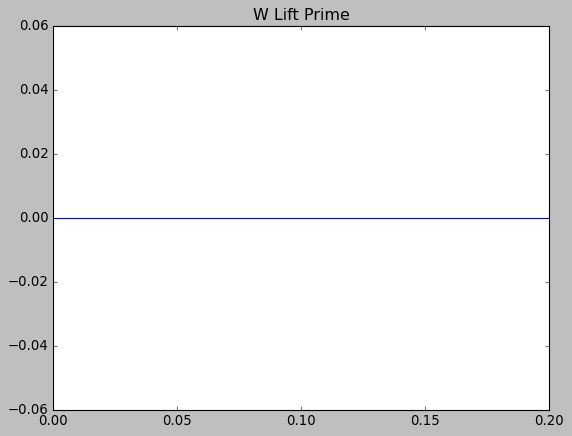

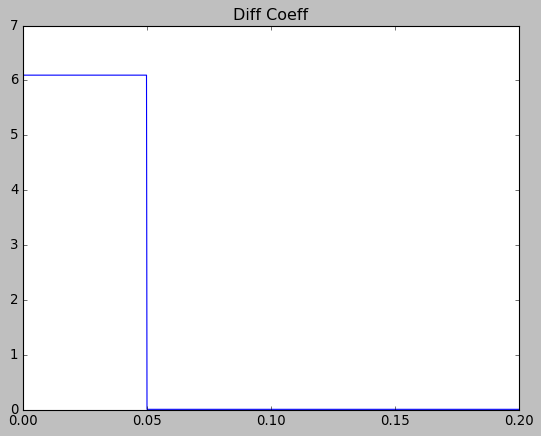

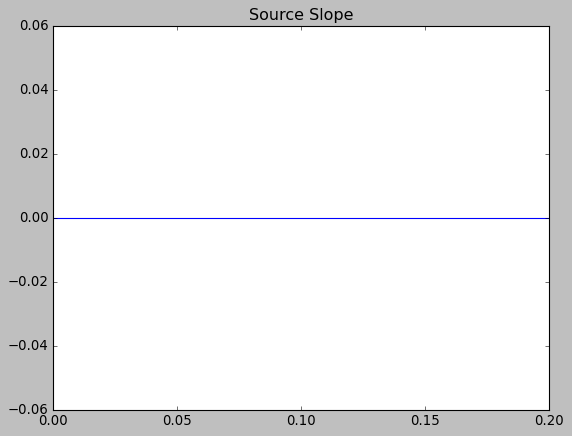

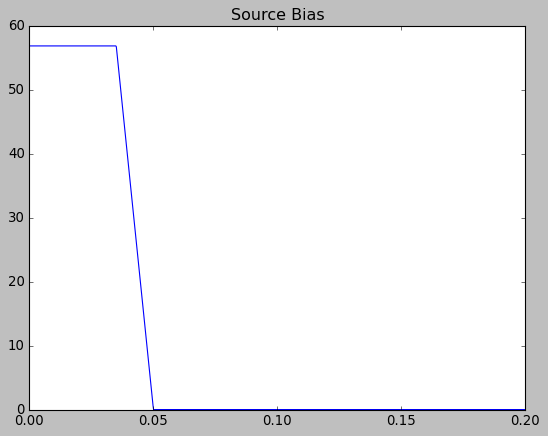

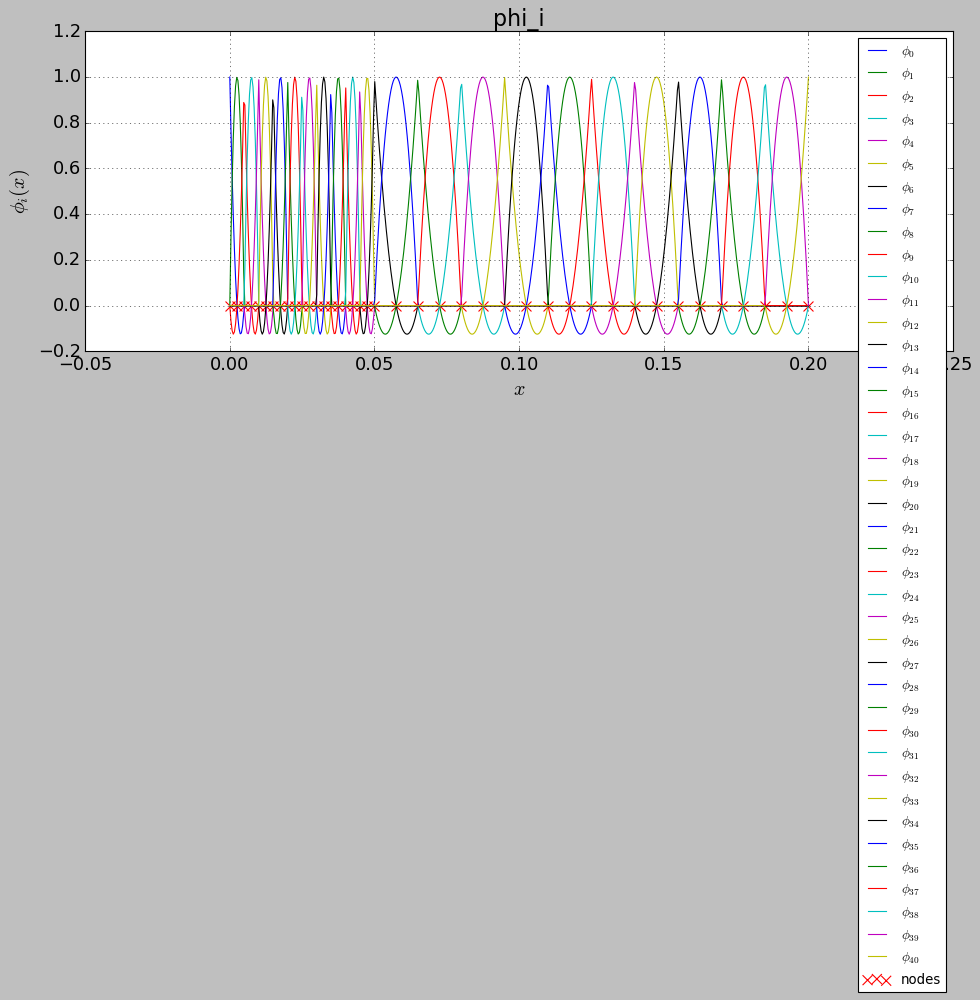

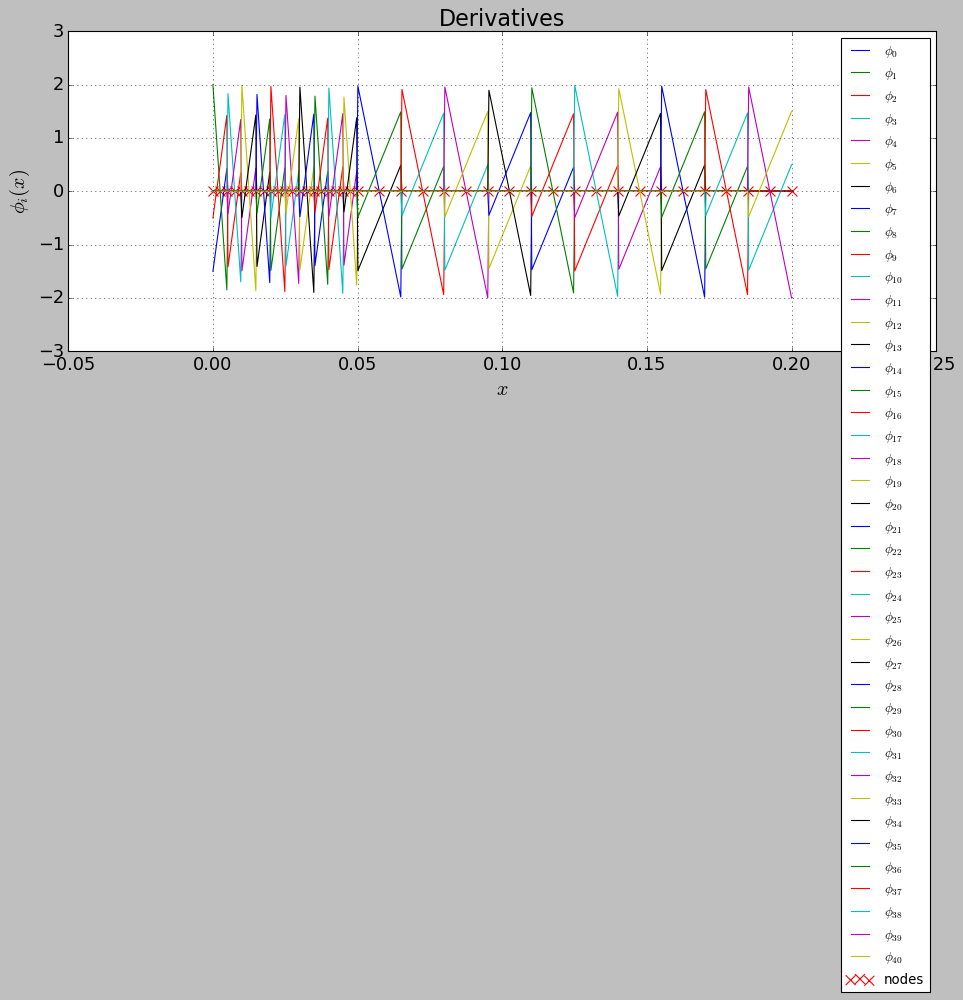

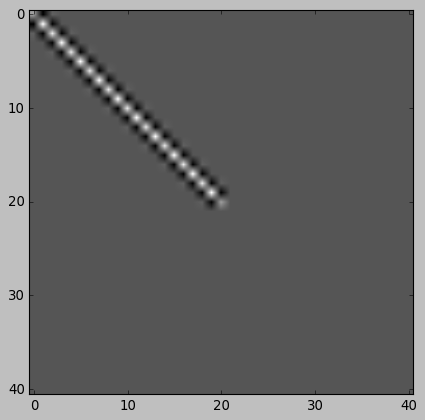

In [6]:
import numpy as np
import numpy as nm
from matplotlib import pyplot as plt
import scipy.integrate
from IPython.display import HTML


import importlib
import engy_5310_Andrew
importlib.reload(engy_5310_Andrew)
from engy_5310_Andrew import *

plt.style.use('classic')
np.set_printoptions(precision=3,threshold=100,edgeitems=5,linewidth=200)

x_a = a = 0.0 # left_boundary in in
x_b = b = 0.2 # Right_boundary in in
'''BC'''
u_a = 200 # degrees C
u_b = 50 # degrees C

u_a_0 = 0
u_b_0 = 0

degree = 2
liftDegree = 1


side_margin = 0.0005

locList = [0.05]
numPartsList = [10,10]


bc_x_min = "neumann"
bc_x_max = "robin"


domain_partition = get_domain_partition(degree, locList,numPartsList, x_a, x_b,bc_x_min,bc_x_max)

heater_power = 56.818     #W/in3


# Conductivity Values 
#Al:  240 W/m*K = 6.096 W/in*K
#Air: 0.03162 W/m*K = 0.0000803 W/in*K
rho_air = 1.135 * (0.0254)**3  # kg/in3
c_p_air = 1.008*1000           # J/kg*K
velocity_air = 33.299          # in/s
k_air = 0.0000803


diffusion_air = k_air/(rho_air*c_p_air)  
kList = [6.096,diffusion_air]

rho_air = 1.135 * (0.0254)**3  # kg/in3
c_p_air = 1.008*1000           # J/kg*K
velocity_air = 33.299          # in/s

h = 1.02     #W/in2 * K
x_min_flux = 0
x_max_u_ref = 25  #deg C

source_slope_value = rho_air*c_p_air*velocity_air    #W/in2 * K

domain_name_list = ["Heated Plate", "Air Channel"]
SList = [0,0]
fList = [heater_power, 0]


k_shape_pts = [(x_a,kList[0]),(0.0499999,kList[0]),(0.05,kList[1]),(x_b,kList[1])]
w_shape_pts =[(x_a,0),(x_b,0)]
#s_shape_pts =[(x_a,0),(0.0499999999,0),(0.05,source_slope_value),(x_b,source_slope_value)]
s_shape_pts =[(x_a,0),(x_b,0)]
f_shape_pts = [(x_a,heater_power),(0.035,heater_power),(0.05,0), (x_b,0)]

femlb_1 = femLagrange(x_a,x_b,degree,liftDegree,f_shape_pts,k_shape_pts,s_shape_pts,w_shape_pts,domain_partition,u_a,u_b,u_a_0,u_b_0,bc_x_min,bc_x_max,h,x_min_flux,x_max_u_ref)

a_mtrx = assemble_a_mtrx_neumann_robin(femlb_1)

b_vec = assemble_b_vec_neumann_robin(femlb_1)

x_plotting_pts = np.linspace(x_a,x_b,1000)
plt.plot(x_plotting_pts,femlb_1.w_lift(x_plotting_pts))
plt.title("W Lift")
plt.show()

plt.plot(x_plotting_pts,femlb_1.w_lift_prime(x_plotting_pts))
plt.title("W Lift Prime")
plt.show()

plt.plot(x_plotting_pts,femlb_1.diff_coeff(x_plotting_pts))
plt.title("Diff Coeff")
plt.show()

plt.plot(x_plotting_pts,femlb_1.source_slope(x_plotting_pts))
plt.title("Source Slope")
plt.show()

plt.plot(x_plotting_pts,femlb_1.source_bias(x_plotting_pts))
plt.title("Source Bias")
plt.show()



plot_func(domain_partition,femlb_1.basis_func_list,x_a,x_b,title=r'phi_i')
plt.show()


plot_func(domain_partition,femlb_1.basis_func_prime_list,x_a,x_b,title=r'Derivatives')
plt.show()

plt.imshow(a_mtrx,cmap="gray")
plt.show()



In [7]:
print("a_mtrx rank:",np.linalg.matrix_rank(a_mtrx))
print("a_mtrx shape:",a_mtrx.shape)
if np.linalg.matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print("A mtrx is full rank")
else:
    print("A mtrx is deficient")
    id_mtrx = np.identity(a_mtrx.shape[0])
    eps = 1e-5

    a_mtrx_fixed = (a_mtrx.transpose() @ a_mtrx) + (eps * id_mtrx)
    a_mtrx = a_mtrx_fixed
    print("A mtrx has been fixed")

a_mtrx rank: 41
a_mtrx shape: (41, 41)
A mtrx is full rank


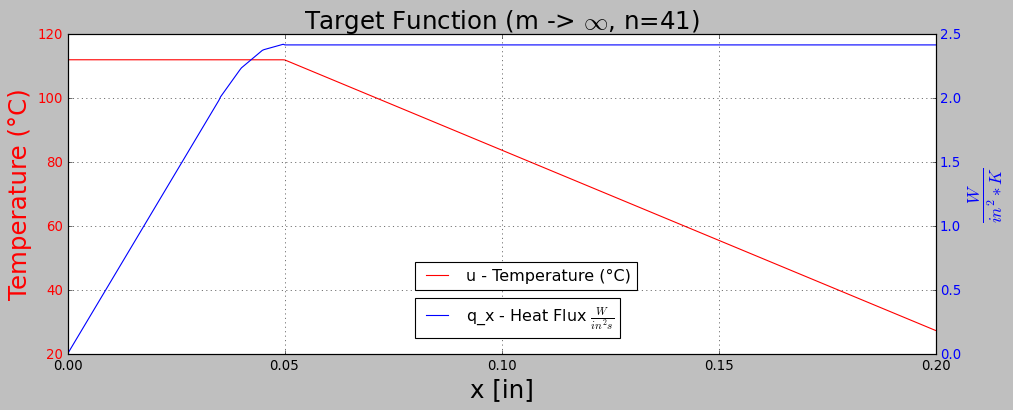

Left bound temperature: 111.95 °C
Right bound temperature: 27.37 °C
************************************************************
Left bound flux: -0.00 W/in2 K
Right bound flux: 2.41 W/in2 K

u_ref: 25 °C
h: 1.02 W/in^2 K


In [8]:
c_star_2 = np.linalg.solve(a_mtrx,b_vec)

n_pts = 500
x_pts = np.linspace(femlb_1.x_a, femlb_1.x_b, n_pts)
N = len(femlb_1.phi_list)


(fig, ax1) = plt.subplots(1, figsize=(14, 5))
ax2 = ax1.twinx()
ax1.plot(x_pts,u_star(x_pts,femlb_1,c_star_2),"r-",label="u - Temperature (°C)")
ax2.plot(x_pts,diff_flux_x_star(x_pts,femlb_1,c_star_2),"b-",label=r"q_x - Heat Flux $\frac{W}{in^2 s}$")

ax1.grid()
plt.title(f"Target Function (m -> $\infty$, n={N})",fontsize=22)
ax1.set_ylabel(r"Temperature (°C)",fontsize=22, color="red")
ax2.set_ylabel(r"$\frac{W}{{in}^2  * K}$",fontsize=22, color="blue")
ax1.set_xlabel(r"x [in]",fontsize=22)
ax1.tick_params(axis="y",labelcolor="red")
ax2.tick_params(axis="y",labelcolor="blue")
ax1.legend(loc=(0.4,0.2))
ax2.legend(loc=(0.4,0.05))
plt.show()

left_bound_temp = u_star(x_a,femlb_1,c_star_2)[0]
right_bound_temp = u_star(x_b,femlb_1,c_star_2)[0]

left_bound_flux =diff_flux_x_star(x_a,femlb_1,c_star_2)[0]
right_bound_flux = diff_flux_x_star(x_b,femlb_1,c_star_2)[0]
print("Left bound temperature:",format(left_bound_temp,".2f"),"°C")
print("Right bound temperature:",format(right_bound_temp,".2f"),"°C")
print("*"*60)
print("Left bound flux:",format(left_bound_flux,".2f"),r"W/in2 K")
print("Right bound flux:",format(right_bound_flux,".2f"),r"W/in2 K")
print("\nu_ref:",x_max_u_ref,"°C")
print("h:",h, "W/in^2 K")

In [9]:
domain_part_list = []
c_vec_list = []
rel_error_list = []
femlb_list = []
error_list = []
max_elems = 11
for i in range(1,max_elems):
    numPartsList = [i,i]

    domain_partition = get_domain_partition(degree, locList,numPartsList, x_a, x_b,bc_x_min,bc_x_max)

    femlb = femLagrange(x_a,x_b,degree,liftDegree,f_shape_pts,k_shape_pts,s_shape_pts,w_shape_pts,domain_partition,u_a,u_b,u_a_0,u_b_0,bc_x_min,bc_x_max,h,x_min_flux,x_max_u_ref)

    a_mtrx = assemble_a_mtrx_neumann_robin(femlb)

    b_vec = assemble_b_vec_neumann_robin(femlb)
    
    c_star = np.linalg.solve(a_mtrx,b_vec)
    
    
    
    (total_power_defect,_) = scipy.integrate.quad(femlb.source_bias,x_a,x_b,limit=1000, epsrel=10e-7, epsabs=10e-7)
    total_power_defect = total_power_defect/1000

    q_left_normalized = diff_flux_x_star(x_a,femlb,c_star)[0]/1000 * -1
    q_right_normalized = diff_flux_x_star(x_b,femlb,c_star)[0]/1000
    
    domain_part_list.append(domain_partition)
    c_vec_list.append(c_star)
    rel_error_list.append(100*(q_left_normalized+q_right_normalized-total_power_defect)/total_power_defect)
    femlb_list.append(femlb)
    if i >1:
        u_old_minus_u_new = lambda x, femlb=femlb, c_star=c_star: (u_old(x) - u_star(x,femlb,c_star))**2
        
        (error,_) = scipy.integrate.quad(u_old_minus_u_new, x_a, x_b, limit=1000, epsrel=10e-7, epsabs=10e-7)
        error = np.sqrt(error)
        error_list.append(error)
        
    u_old = lambda x, femlb=femlb,c_star=c_star: u_star(x, femlb,c_star)


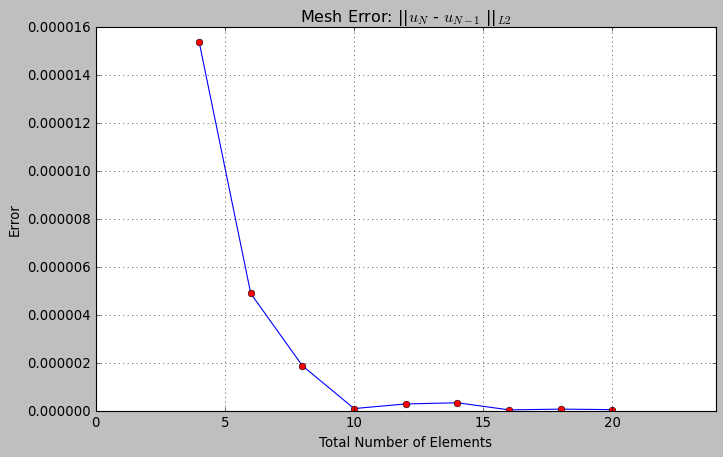

In [10]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(4,max_elems*2-2,max_elems-2),error_list)
plt.plot(np.linspace(4,max_elems*2-2,max_elems-2),error_list, "ro")
plt.xlim(0,max_elems*2+2)
plt.ylabel("Error")
plt.xlabel("Total Number of Elements")
plt.title(r"Mesh Error: ||$u_N$ - $u_{N-1}$ ||$_{L2}$")
plt.grid()
plt.show()

In [ ]:
'''Input file'''

In [ ]:
'''Run MOOSE App'''

In [ ]:
'''Solution'''

#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

In [ ]:
'''Parameters'''

In [ ]:
'''Input file mod'''

In [ ]:
'''Run MOOSE App'''

In [ ]:
'''Solution'''

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [ ]:
'''Parameters'''

In [ ]:
'''FEM Parameters'''

In [ ]:
'''Input file mod'''

In [ ]:
'''Run MOOSE App'''

In [ ]:
'''Show 2D solution'''

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()